#### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import LinearSVC


In [4]:
import folium as fl
from IPython.display import display

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.svm import SVR

#### 2.Import Dataset

In [6]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [7]:
#data.shape()
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


#### 3. EDA

##### 3.1 Univariate Analysis

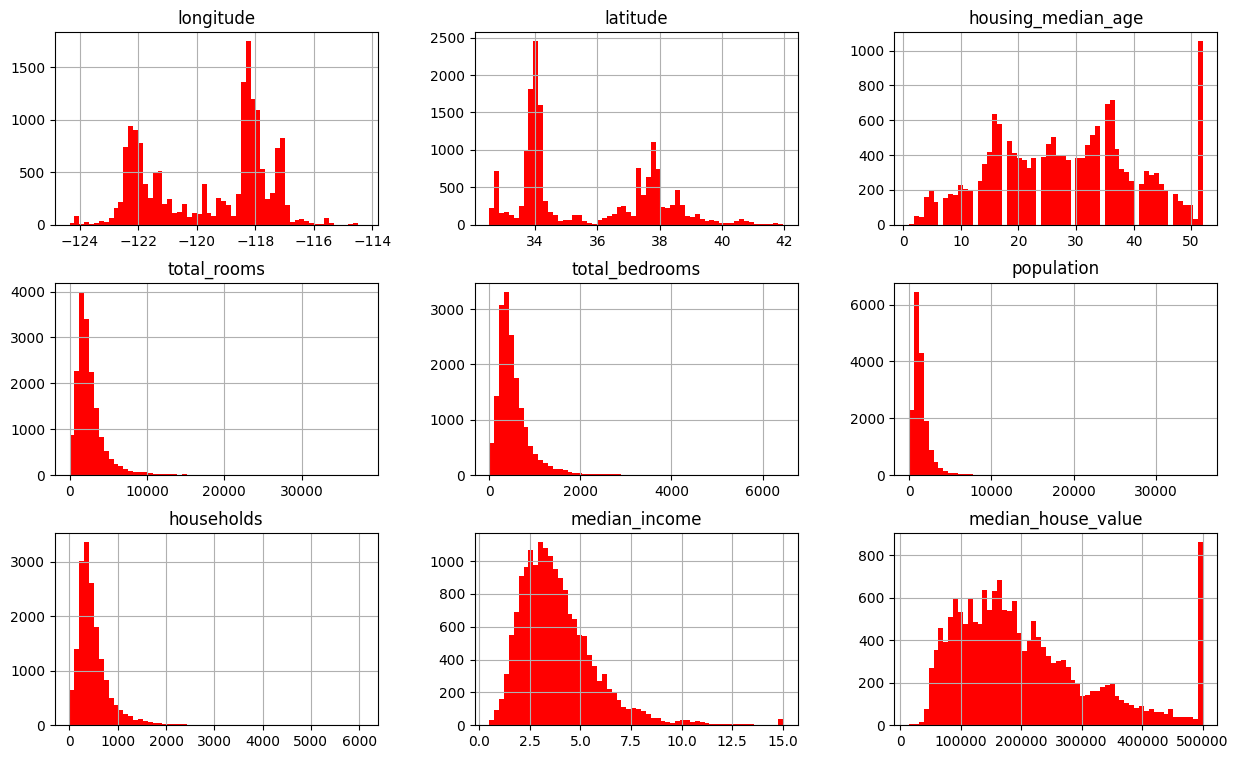

In [ ]:
data.hist(bins=60, figsize=(15,9),color='red');plt.show()

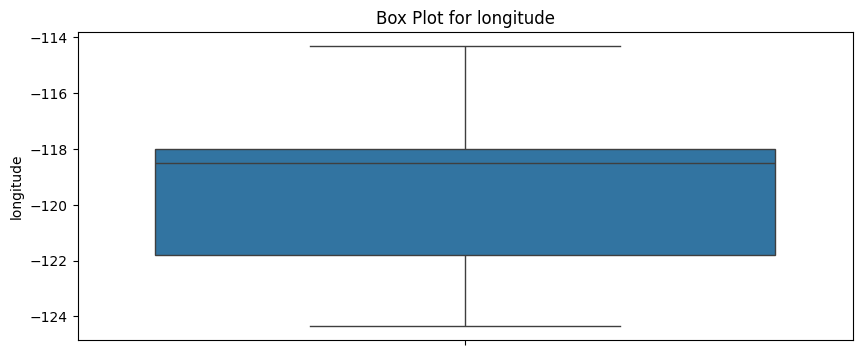

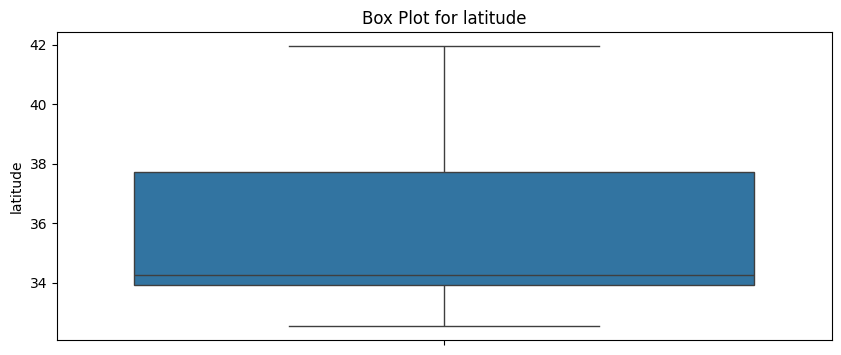

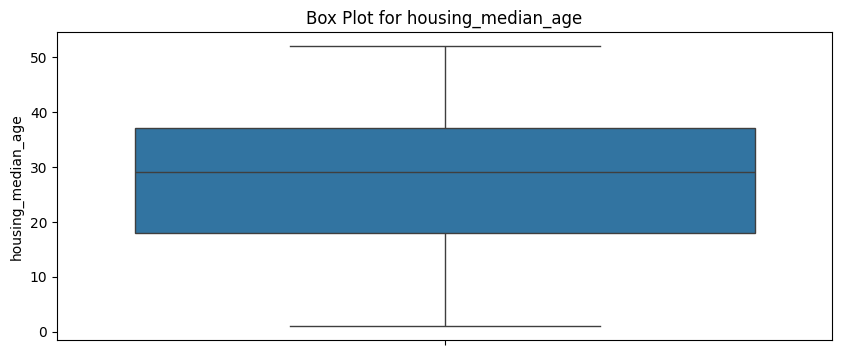

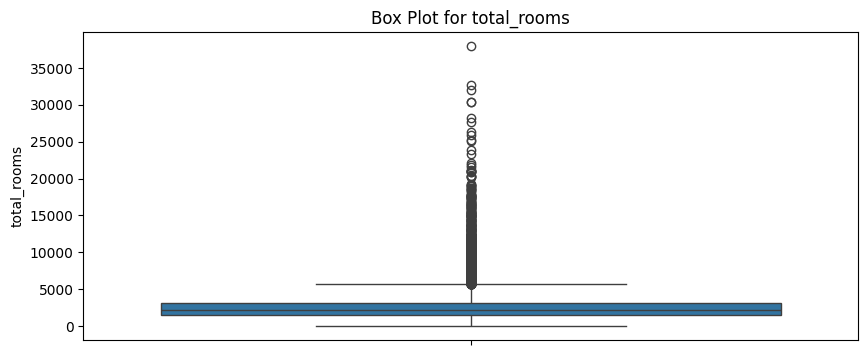

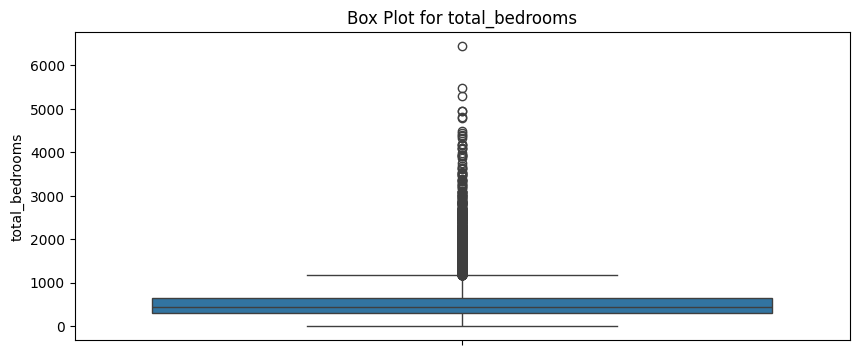

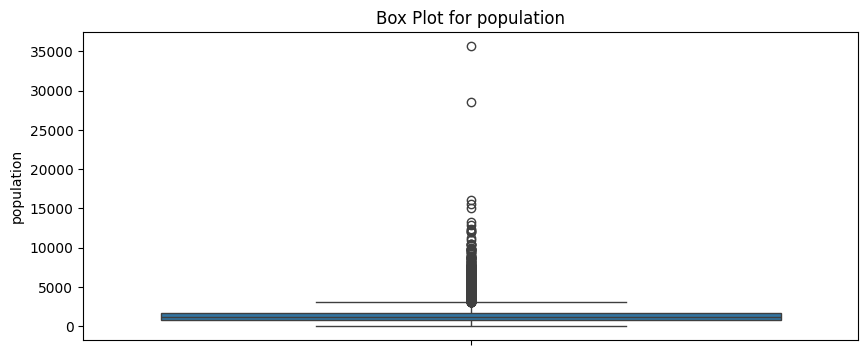

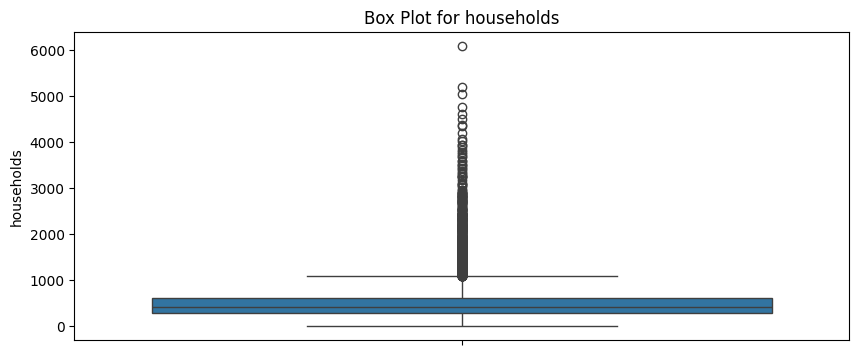

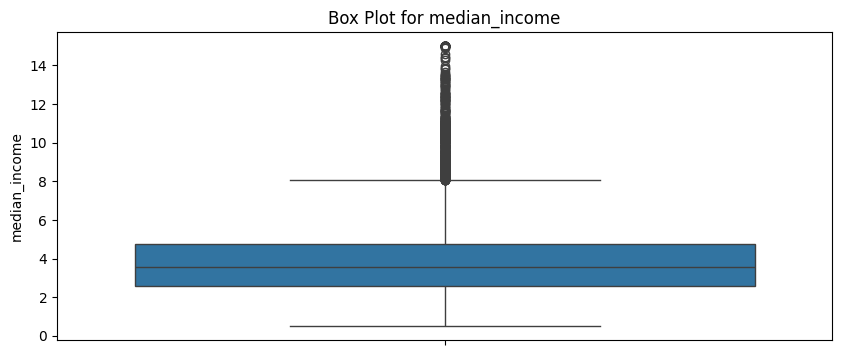

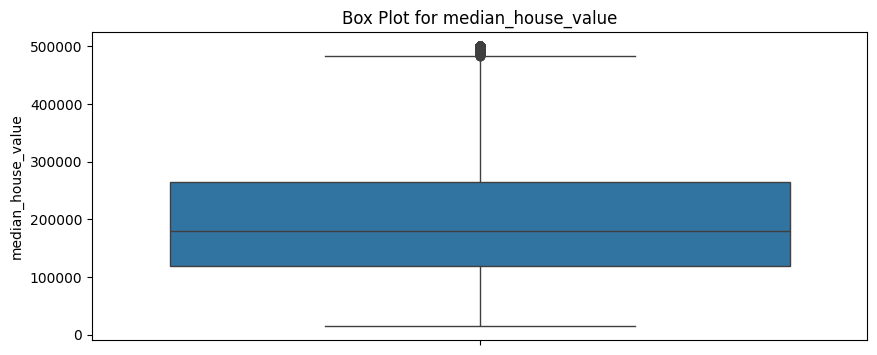

In [14]:
#Box Plot
for i in data.columns:
  plt.figure(figsize=(10,4))
  sns.boxplot(y=data[i])
  plt.title(f"Box Plot for {i}")
#plt.show()

##### 3.2 Bivariate Analysis

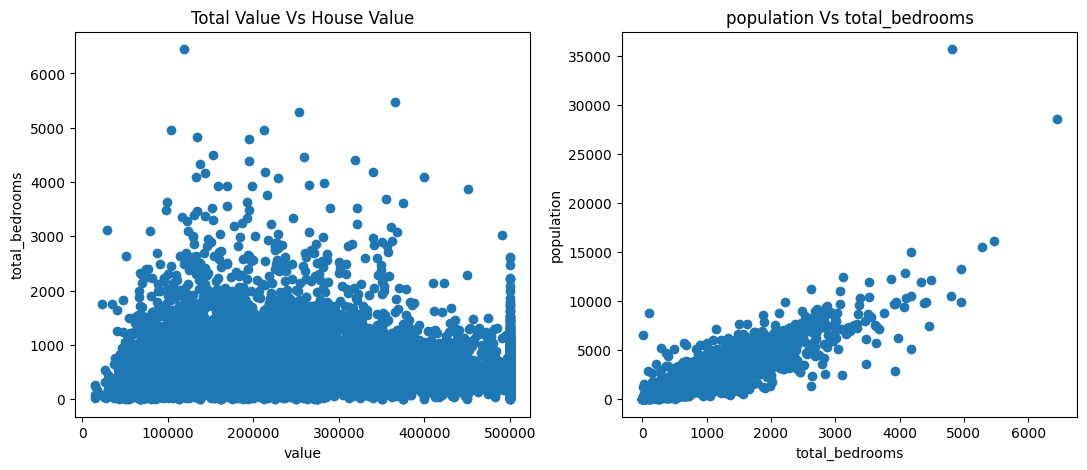

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(data=data,y='total_bedrooms',x='median_house_value')
plt.title('Total Value Vs House Value')
plt.xlabel('value')
plt.ylabel('total_bedrooms')
plt.subplot(132)
plt.scatter(data=data,y='population',x='total_bedrooms')
plt.title('population Vs total_bedrooms')
plt.xlabel('total_bedrooms')
plt.ylabel('population')
plt.show()

In [ ]:
lats = pd.Series(data['latitude'])
longs = pd.Series(data['longitude'])

latitude_list = lats.tolist()
longitude_list = longs.tolist()

Locations = list(zip(latitude_list, longitude_list))
map = fl.Map(location=[latitude_list[0], longitude_list[0]], zoom_start=2)

for lat, lon in Locations:
    fl.Marker([lat, lon], popup=f'Lat:{lat}, Lon:{lon}').add_to(map)

#display(map)

In [20]:
# Seeing through Corralation matric
corr = data.corr()

In [21]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


<Axes: >

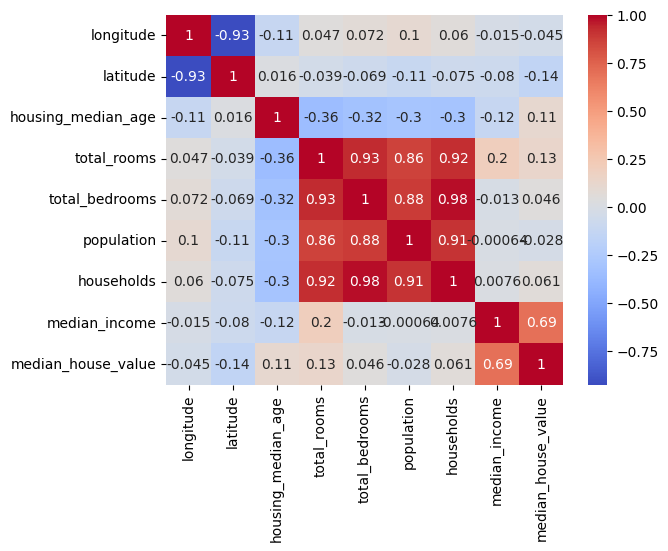

In [22]:
sns.heatmap(corr,annot= True, cmap = 'coolwarm')

In [23]:
x = data.drop('median_house_value',axis = 1)
y = data['median_house_value']

In [ ]:
y.head(10)

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
5    74000.0
6    82400.0
7    48500.0
8    58400.0
9    48100.0
Name: median_house_value, dtype: float64

#### Data Preprocessing

##### 4. Handling Outliers

<Axes: >

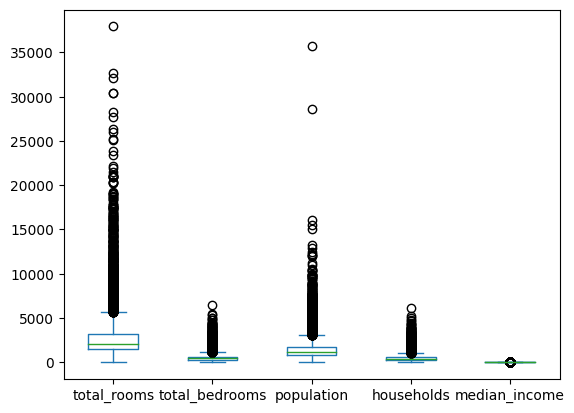

In [24]:
outlier_columns = ['total_rooms','total_bedrooms','population','households','median_income']
outlier = data[outlier_columns]
#data.plot(kind='box')
#plt.show()
outlier.plot(kind='box')

In [25]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from each column
no_outliers = data.copy()
for column in no_outliers.columns:
    no_outliers = remove_outliers_iqr(no_outliers, column)

print(no_outliers)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
5        -114.58     33.63                29.0       1387.0           236.0   
6        -114.58     33.61                25.0       2907.0           680.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

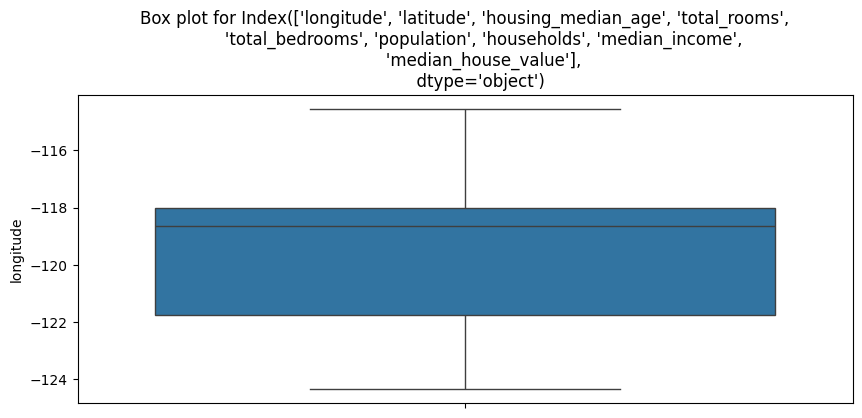

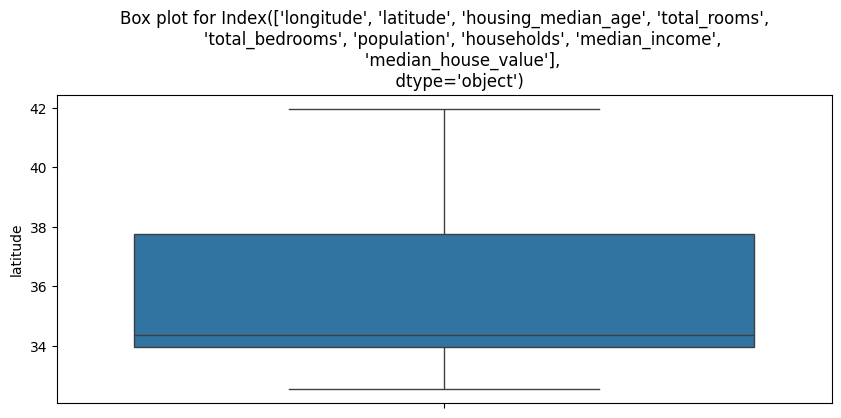

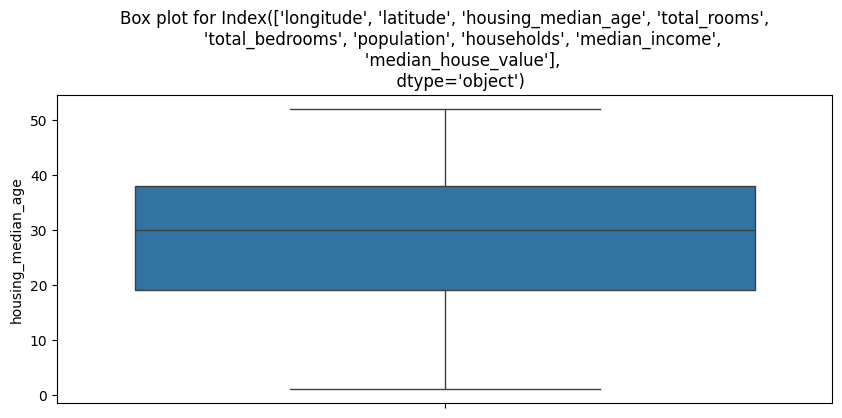

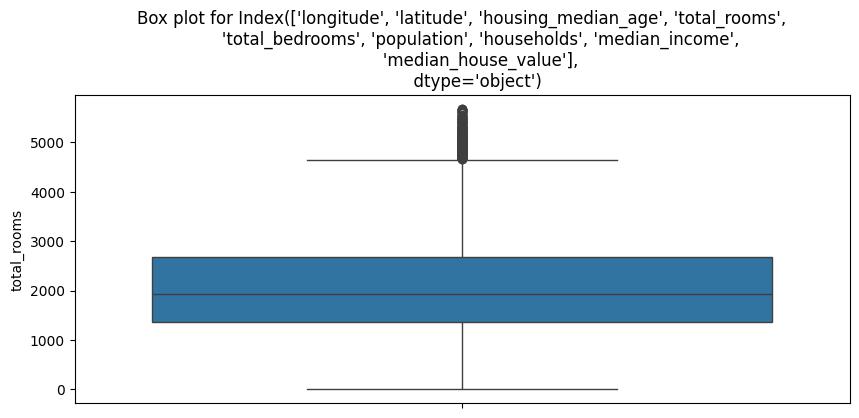

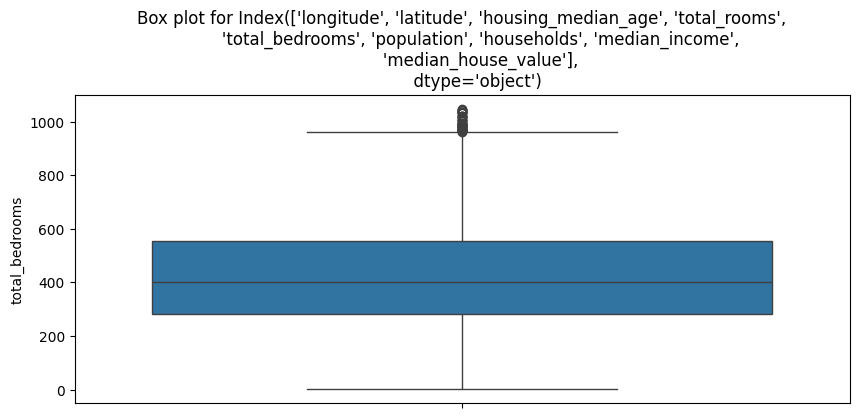

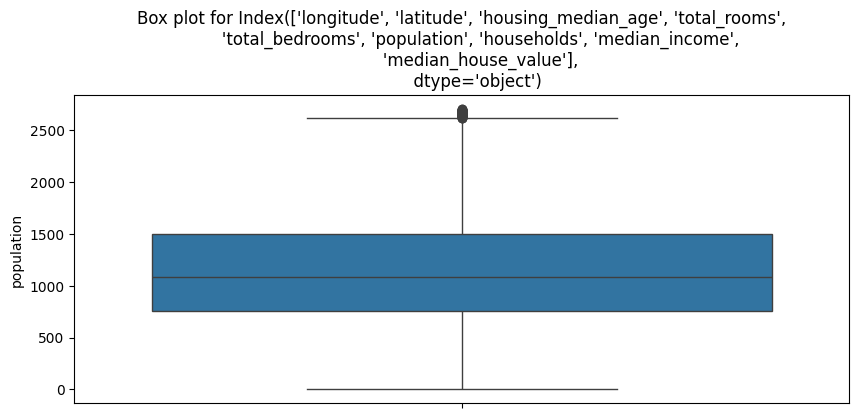

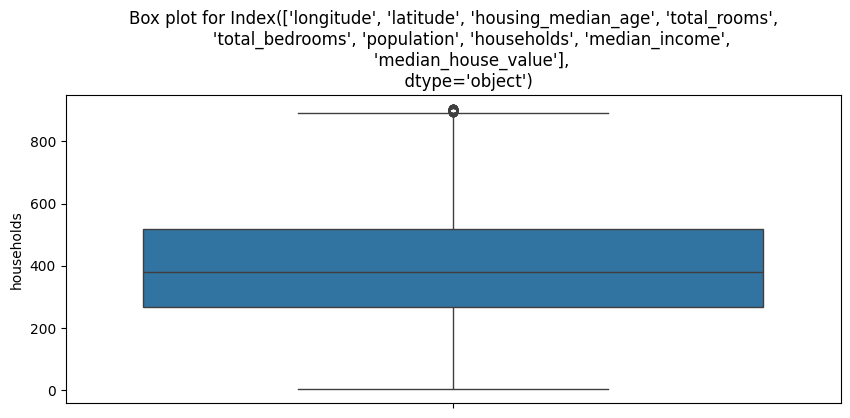

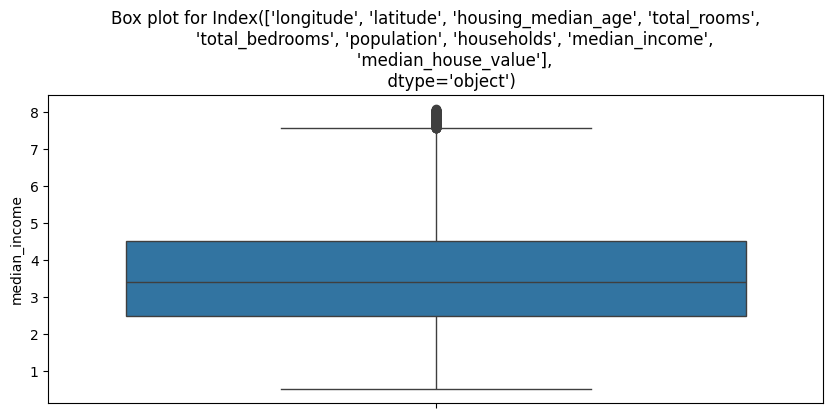

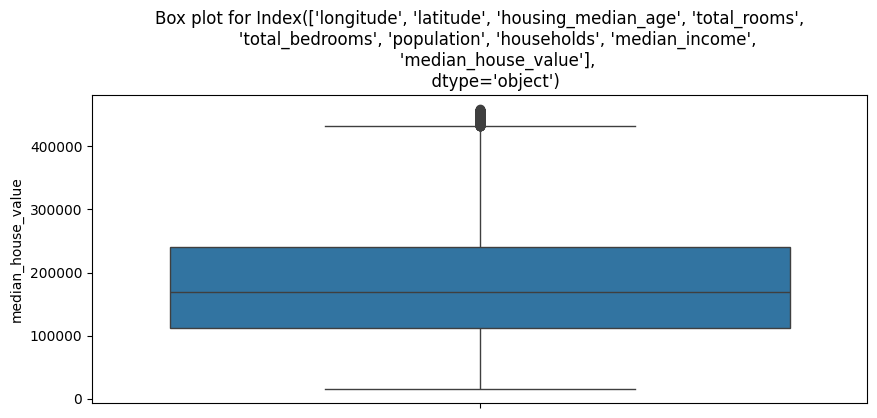

In [26]:
for i in no_outliers.columns:
  plt.figure(figsize=(10,4))
  sns.boxplot(y=no_outliers[i])
  plt.title(f"Box plot for {no_outliers.columns}")
  plt.show()

<Axes: >

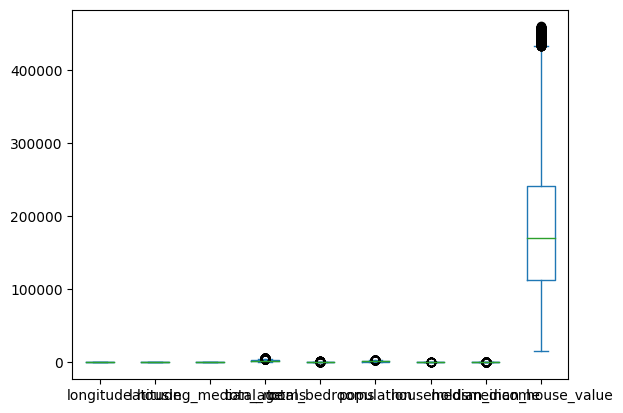

In [27]:
outlier_columns = no_outliers.columns
outlier = no_outliers[outlier_columns]
#data.plot(kind='box')
#plt.show()
outlier.plot(kind='box')

#### 5. Modelling

In [28]:
x=no_outliers.drop('median_house_value',axis = 1)
y=no_outliers['median_house_value']

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state = 40)

In [30]:
#from sklearn.preprocessing import StandardScalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar_feature = scalar.fit_transform(x)


##### 5.1 Linear Regression

In [31]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [32]:
pred = reg.predict(X_test)
mse = mean_squared_error(Y_test,pred)
mae = mean_absolute_error(Y_test,pred)
r2 = r2_score(Y_test,pred)
print (f'The MSE : {mse}')
print (f'The MAE : {mae}')
print (f'The r2 : {r2}')

The MSE : 3190275227.706342
The MAE : 42565.9564164087
The r2 : 0.6226220955091835


##### 5.2 RandomForestRegressor

In [33]:
rfg = RandomForestRegressor()
rfg.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
rfg_pred = rfg.predict(X_test)
mse_rfg = mean_squared_error(Y_test,rfg_pred)
mae_rfg = mean_absolute_error(Y_test,rfg_pred)
r2_rfg = r2_score(Y_test,rfg_pred)
print (f'The MSE : {mse_rfg}')
print (f'The MAE : {mae_rfg}')
print (f'The r2 : {r2_rfg}')

The MSE : 1790151691.8644056
The MAE : 28447.60519469282
The r2 : 0.788242817318875


##### 5.3 GradientBoostingRegressor


In [35]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [36]:
gbr_pred = gbr.predict(X_test)
mse_gbr = mean_squared_error(Y_test,gbr_pred)
mae_gbr = mean_absolute_error(Y_test,gbr_pred)
r2_gbr = r2_score(Y_test,gbr_pred)
print (f'The MSE : {mse_gbr}')
print (f'The MAE : {mae_gbr}')
print (f'The r2 : {r2_gbr}')

The MSE : 2173194384.354435
The MAE : 33280.146337974096
The r2 : 0.7429326674712917


##### 5.4 SVR

In [ ]:
SVR_pred = SVR.predict(X_test)
mse_svr = mean_squared_error(Y_test,SVR_pred)
mae_svr = mean_absolute_error(Y_test,SVR_pred)
r2_svr = r2_score(Y_test,SVR_pred)
print (f'The MSE : {mse_svr}')
print (f'The MAE : {mae_svr}')
print (f'The r2 : {r2_svr}')

The MSE : 8668654823.371271
The MAE : 73331.41618647116
The r2 : -0.02541585239653843


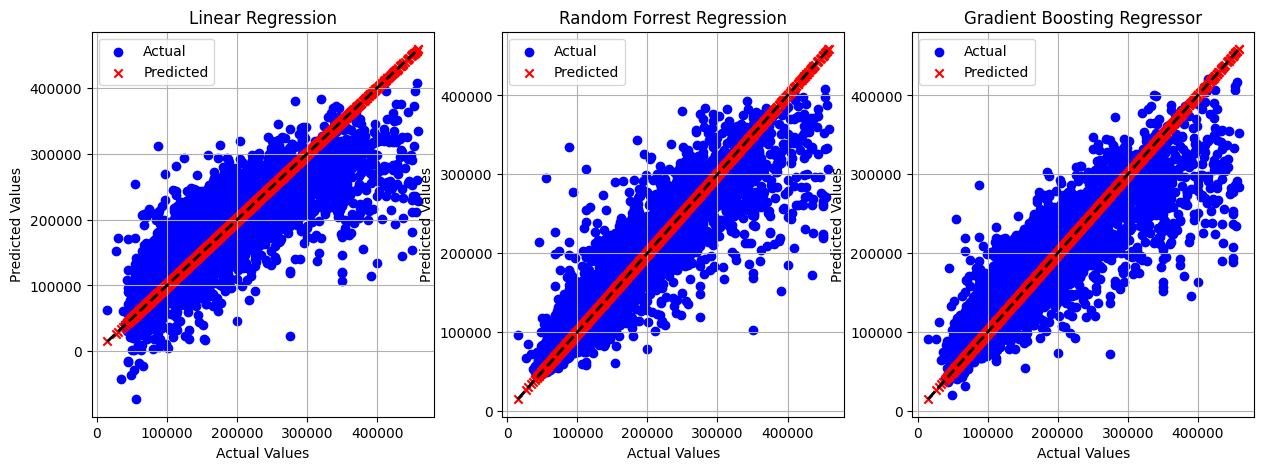

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.scatter(Y_test, pred, color='blue', label='Actual', marker='o')
plt.scatter(Y_test, Y_test, color='red', label='Predicted', marker='x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.subplot(132)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.scatter(Y_test, rfg_pred, color='blue', label='Actual', marker='o')
plt.scatter(Y_test, Y_test, color='red', label='Predicted', marker='x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forrest Regression')
plt.legend()
plt.grid(True)
plt.subplot(133)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.scatter(Y_test, gbr_pred, color='blue', label='Actual', marker='o')
plt.scatter(Y_test, Y_test, color='red', label='Predicted', marker='x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regressor')
plt.legend()
plt.grid(True)
plt.show()

#### 6. Testing with Unkowndata

In [61]:
test_data = data.loc[988]
test_data

longitude               -117.0900
latitude                  32.6200
housing_median_age        34.0000
total_rooms             1576.0000
total_bedrooms           364.0000
population              1153.0000
households               381.0000
median_income              2.1955
median_house_value    129700.0000
Name: 988, dtype: float64

In [45]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [50]:
unkowndata = pd.DataFrame({
    'longitude':[-114],
    'latitude':[34],
    'housing_median_age':[48],
    'total_rooms':[1291],
    'total_bedrooms':[248],
    'population':[580],
    'households':[211],
    'median_income':[2.1]})

In [51]:
y_unknown_pred = rfg.predict(unkowndata)
print(y_unknown_pred)

[70646.]


In [63]:
unkowndata2 = pd.DataFrame({
    'longitude':[-117.0900],
    'latitude':[32.6200],
    'housing_median_age':[34.0000],
    'total_rooms':[1576.0000],
    'total_bedrooms':[248],
    'population':[580],
    'households':[211],
    'median_income':[2.1]})

In [64]:
y_unknown_pred2 = rfg.predict(unkowndata2)
print(y_unknown_pred2)

[113843.]
